In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os


In [2]:
# path = "/home/gayane/BartLM/fairseq/scripts/u_map_files/[0]embeddings-100-0.99.pt"
# df = torch.load(path)

In [3]:
# df.shape

NameError: name 'df' is not defined

In [ ]:
# path = "/home/gayane/BartLM/fairseq/scripts/u_map_files/embeddings-100-0.99/archive/data.pkl"
# df = pd.read_pickle(path)

In [ ]:
df

array([[-1.0670958 , -2.56634   ],
       [ 2.1684747 ,  0.18654625],
       [-0.15592791,  6.545653  ],
       ...,
       [-4.1209474 ,  4.1577907 ],
       [-1.4737933 ,  1.077373  ],
       [-1.4747684 ,  2.794688  ]], dtype=float32)

/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


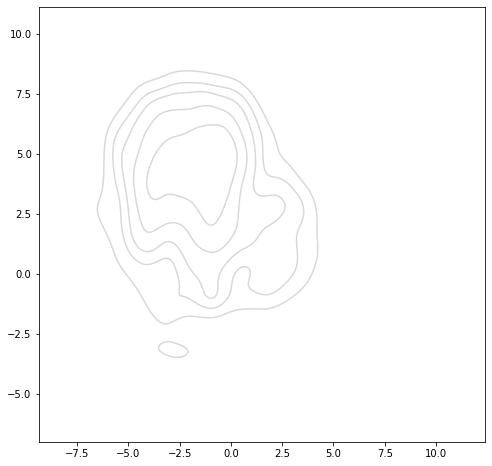

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(df[:, 0], df[:, 1], color="grey", alpha=0.3, thresh=.2, levels=6)
plt.show()

/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


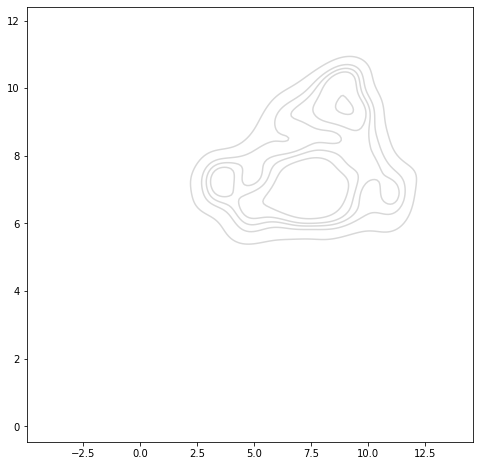

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(df[:, 0], df[:, 1], color="grey", alpha=0.3, thresh=.2, levels=6)
plt.show()

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os

In [11]:
np_filename = '/mnt/good/gayane/data/data_load_folder/BBBP_clintox_Tox21_SIDER_Genotoxicity_esol_ZINC/np_pretrainedTrue_489740_umap_40_0.4.npy'
df_filename = '/mnt/good/gayane/data/data_load_folder/BBBP_clintox_Tox21_SIDER_Genotoxicity_esol_ZINC/df_pretrainedTrue_489740_umap_40_0.4.csv'

In [9]:
X = np.load(np_filename)
df = pd.read_csv(df_filename)
in_ = [(2039, 3517), (4995, 6422), (3517, 4995), (6422, 7063)]

In [10]:
X = np.load(np_filename)
df = pd.read_csv(df_filename)
BBBP_x = X[: 2039]
clintox_x = X[2039 : 3517]
Tox21_x = X[3517 : 4995]
SIDER_x = X[3517 : 4995]
MN_x = X[:2039]
esol_x = X[:2039]

(489740, 2)

In [12]:
X.shape

(489740, 2)

ZINC


/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

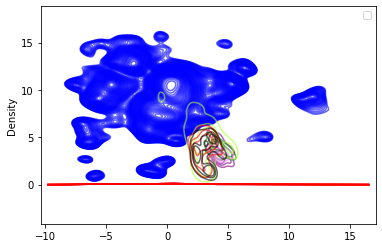

In [17]:
pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

# log_save_dir = Path(f"./umap-graph-all{pretr}/")
# log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [100] # [10, 40, 80, 100]
min_dists = [0.8] # [0.4, 0.6, 0.8, 1]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

# color = ["black", "purple"] #, "green", "gray", "pink", "blue"]

color = ["blue", "purple", "green", "greenyellow", "violet", "red",  "black"]

leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))
dataset_name_list = ["ZINC", "BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol"] 
# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196]
in_ = [(13416, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]

# fig, ax = plt.subplots(figsize=(8,8))
np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X = np.load(np_filename)
df_ = pd.read_csv(df_filename) 
# for n_neighbor in n_neighbors:
#     for min_dist in min_dists:
for i, data_name in enumerate(dataset_name_list):
#             np_filename = f'{path}/np_{data_name}_pretrainedTrue.npy'
#             df_filename = f'{path}/df_{data_name}_pretrainedTrue.csv'
#             print(data_name)
#             X_data = np.load(np_filename)
#             df_data = pd.read_csv(df_filename)

#             Zinc = len(X_data.shape) == 3
#             n = X_data.shape[0]
#             tp = ["train"]*n if Zinc else None
#             tr = np.zeros(n) if Zinc else None
#             X_data, df_data["target"], df_data["level_0"] = X_data.reshape(n, 1024), tr, tp if Zinc else X_data

#             print(X_data.shape, X.shape)
#             X = np.concatenate((X, X_data))
#             df_ = pd.concat([df_, df_data])
#         print(f"---------- neighbor:  {n_neighbor}, minimum distance: {min_dist} ----------")
#         reducer = umap.UMAP(
#             n_components=2, min_dist=min_dist, n_neighbors=n_neighbor, transform_seed=5, verbose=False
#         ).fit(X)
        
#         X_umap_ = reducer.transform(X)
#         data = {
#                 "x": X_umap_[:, 0].tolist(),
#                 "y": X_umap_[:, 1].tolist(),
#                 "label": df_["target"].values,
#                 "split": df_["level_0"].values,

#             }
#         df_ = pd.DataFrame(data=data)

#         np_filename = f'{path}/np_{data_name}_pretrainedTrue_umap_{n_neighbor}_{min_dist}.npy'
#         df_filename = f'{path}/df_{data_name}_pretrainedTrue_umap_{n_neighbor}_{min_dist}.csv'
#         print(f"Saving to {df_filename}")
#         df_.to_csv(df_filename)
#         print(f"Saving to {np_filename}")
#         np.save(file=np_filename, arr=X_umap_)
    # for i, data_name in enumerate(dataset_name_list):
    if data_name == "ZINC":

        ax = sns.kdeplot(df_["x"].values[in_[i][0] : ], df_["y"].values[in_[i][0] : ], alpha=0.6, thresh=.2, levels=80, label=f"{data_name}", color=color[i])
    else:
        ax = sns.kdeplot(df_["x"].values[in_[i][0] : in_[i][1]], df_["y"].values[in_[i][0] : in_[i][1]], alpha=0.6, thresh=.2, levels=4, label=f"{data_name}", color=color[i])
    # ax = sns.kdeplot(df[df["label"] ==1]["x"].values, df[df["label"] ==1]["y"].values,  alpha=0.6, thresh=.2, levels=6, label=f"{data_name}_1")
    ax = sns.distplot(df_[df_["label"] ==0]["x"].values, df_[df_["label"] ==0]["y"].values, kde=True, hist=False, color="r")

handles = [mpatches.Patch(facecolor=color[i], label=dataset_name_list[i]) for i in range(len(dataset_name_list))]
plt.legend(handles=handles)    # leg.append(f"{data_name}_1")
plt.legend(leg)
plt.show()


ZINC


/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

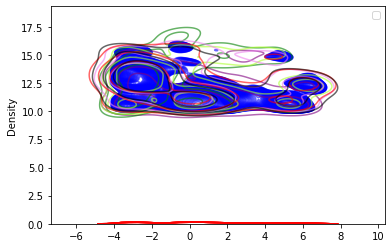

In [16]:
pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

# log_save_dir = Path(f"./umap-graph-all{pretr}/")
# log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [100] # [10, 40, 80, 100]
min_dists = [0.8] # [0.4, 0.6, 0.8, 1]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

# color = ["black", "purple"] #, "green", "gray", "pink", "blue"]

color = ["blue", "purple", "green", "greenyellow", "violet", "red",  "black"]

leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))
dataset_name_list = ["ZINC", "BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol"] 
# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196]
in_ = [(13416, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]

# fig, ax = plt.subplots(figsize=(8,8))
np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X = np.load(np_filename)
df_ = pd.read_csv(df_filename) 
# for n_neighbor in n_neighbors:
#     for min_dist in min_dists:
for i, data_name in enumerate(dataset_name_list):
#             np_filename = f'{path}/np_{data_name}_pretrainedTrue.npy'
#             df_filename = f'{path}/df_{data_name}_pretrainedTrue.csv'
#             print(data_name)
#             X_data = np.load(np_filename)
#             df_data = pd.read_csv(df_filename)

#             Zinc = len(X_data.shape) == 3
#             n = X_data.shape[0]
#             tp = ["train"]*n if Zinc else None
#             tr = np.zeros(n) if Zinc else None
#             X_data, df_data["target"], df_data["level_0"] = X_data.reshape(n, 1024), tr, tp if Zinc else X_data

#             print(X_data.shape, X.shape)
#             X = np.concatenate((X, X_data))
#             df_ = pd.concat([df_, df_data])
#         print(f"---------- neighbor:  {n_neighbor}, minimum distance: {min_dist} ----------")
#         reducer = umap.UMAP(
#             n_components=2, min_dist=min_dist, n_neighbors=n_neighbor, transform_seed=5, verbose=False
#         ).fit(X)
        
#         X_umap_ = reducer.transform(X)
#         data = {
#                 "x": X_umap_[:, 0].tolist(),
#                 "y": X_umap_[:, 1].tolist(),
#                 "label": df_["target"].values,
#                 "split": df_["level_0"].values,

#             }
#         df_ = pd.DataFrame(data=data)

#         np_filename = f'{path}/np_{data_name}_pretrainedTrue_umap_{n_neighbor}_{min_dist}.npy'
#         df_filename = f'{path}/df_{data_name}_pretrainedTrue_umap_{n_neighbor}_{min_dist}.csv'
#         print(f"Saving to {df_filename}")
#         df_.to_csv(df_filename)
#         print(f"Saving to {np_filename}")
#         np.save(file=np_filename, arr=X_umap_)
    # for i, data_name in enumerate(dataset_name_list):
    X_filter = X[(X[:,0] >= -4) & (X[:,0] <= 7) & (X[:,1] >= 8.5)]
    df_filter = df[(X[:,0] >= -4) & (X[:,0] <= 7) & (X[:,1] >= 8.5)]
    if data_name == "ZINC":

        ax = sns.kdeplot(df_filter["x"].values[in_[i][0] : ], df_filter["y"].values[in_[i][0] : ], alpha=0.6, thresh=.2, levels=120, label=f"{data_name}", color=color[i])
    else:
        ax = sns.kdeplot(df_filter["x"].values[in_[i][0] : in_[i][1]], df_filter["y"].values[in_[i][0] : in_[i][1]], alpha=0.6, thresh=.2, levels=4, label=f"{data_name}", color=color[i])
    # ax = sns.kdeplot(df[df["label"] ==1]["x"].values, df[df["label"] ==1]["y"].values,  alpha=0.6, thresh=.2, levels=6, label=f"{data_name}_1")
    ax = sns.distplot(df_filter[df_filter["label"] ==0]["x"].values, df_filter[df_filter["label"] ==0]["y"].values, kde=True, hist=False, color="r")

handles = [mpatches.Patch(facecolor=color[i], label=dataset_name_list[i]) for i in range(len(dataset_name_list))]
plt.legend(handles=handles)    # leg.append(f"{data_name}_1")
plt.legend(leg)
plt.show()


In [58]:
data = {
                    "x": X_umap_[:, 0].tolist(),
                    "y": X_umap_[:, 1].tolist(),
                    "label": df["target"].tolist(),
                    "split": df["level_0"].tolist(),

                }

In [77]:
len(data["x"]), data.keys(), X_data.shape

(3552, dict_keys(['x', 'y', 'label', 'split']), (24948, 1, 1024))

In [59]:
len(data["label"]), len(df["target"]), len(df_.SMILES)

(1478, 1478, 1513)

In [66]:
df_

,x,y,label,split
0,3.127506,13.054391,1,train
1,1.057910,15.607585,1,train
2,1.084553,15.835610,1,train
3,2.805416,14.474736,1,train
4,2.702686,14.510690,1,train
...,...,...,...,...
3547,3.018986,12.462984,1,test
3548,4.042947,9.074398,1,test
3549,4.773540,9.577384,1,test
3550,5.489856,6.606085,1,test


In [45]:
X_umap_.shape

(1427, 2)

In [44]:
data_name

'SIDER_0'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os


pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

log_save_dir = Path(f"./umap-graph-all{pretr}/")
log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [40]
min_dists = [0.4]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

color = ["blue", "purple", "green", "greenyellow", "violet", "red",  "black"]


leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))
dataset_name_list = ["BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol","ZINC"] 
# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196]
in_ = [(14544, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]


# dataset_len = [475196, 2039, 1478, 7831, 1427, 641]
# in_ = [(0, 475196), (475196, 477235), (477235, 478713), (478713, 486544), (486544, 487971), (487971, 488612)]

np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X_ = np.load(np_filename)
df_0 = pd.read_csv(df_filename) 
dir_name = '_'.join(dataset_name_list)
os.system(f"mkdir -p {path}/{dir_name}")
data_len = 489740
for n_neighbor in n_neighbors:
    for min_dist in min_dists:

        np_filename = f'{path}/{dir_name}/np_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.npy'
        df_filename = f'{path}/{dir_name}/df_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.csv'
        filename = ""
        for i, data_name in enumerate(dataset_name_list):
            df_data = pd.DataFrame()
            filename = filename + f"_{data_name}"
            if i == 0: 
                X = X_
                df_ = df_0
            else:
                print("Create umap matrix part")

                np_filename_ = f'{path}/np_{data_name}_pretrainedTrue.npy'
                df_filename_ = f'{path}/df_{data_name}_pretrainedTrue.csv'
                print(data_name)
                X_data = np.load(np_filename_)
                if os.path.exists(df_filename_):
                    df_data = pd.read_csv(df_filename_)

                Zinc = data_name == "ZINC"
                n = X_data.shape[0]
                tp = ["train"]*n if Zinc else None
                tr = np.zeros(n) if Zinc else None
                X_data = X_data.reshape(n, 1024) if Zinc else X_data
                df_data["target"] = tr if Zinc else df_data["target"]
                df_data["level_0"] = tp if Zinc else df_data["level_0"]

                print(X_data.shape, X.shape)
                X = np.concatenate((X, X_data))
                df_ = pd.concat([df_, df_data], ignore_index=True, sort=False)

                if data_name == "ZINC":
                    df_data.to_csv(f'{path}/df_{data_name}_pretrainedTrue.csv')

BBBP
Create umap matrix part
clintox
(1478, 1024) (2039, 1024)
Create umap matrix part
Tox21
(7831, 1024) (3517, 1024)
Create umap matrix part
SIDER
(1427, 1024) (11348, 1024)
Create umap matrix part
Genotoxicity
(641, 1024) (12775, 1024)
Create umap matrix part
esol
(1128, 1024) (13416, 1024)
Create umap matrix part
ZINC
(475196, 1024) (14544, 1024)


In [ ]:
dataset_name_list__ = ["ZINC", "HIV", "Tox21", "lipo", "BBBP", "clintox", "SIDER", "Genotoxicity", "esol"] 

in_ = [(14544, 489740), (493940, 535067), (3517, 11348), (489740, 493940), (0, 2039), (2039, 3517), (11348, 12775), (12775, 13416), (13416, 14544)]


In [26]:
np_filename = '/mnt/good/gayane/data/data_load_folder/np_HIV_pretrainedTrue.npy'
df_filename = '/mnt/good/gayane/data/data_load_folder/BBBP_clintox_Tox21_SIDER_Genotoxicity_esol_ZINC_lipo_HIV/df_pretrainedTrue_535067_umap_40_0.4.csv'

In [27]:
X = np.load(np_filename)
# df = pd.read_csv(df_filename)
# BBBP_x = X[: 2039]
# clintox_x = X[2039 : 3517]
# Tox21_x = X[3517 : 11348]
# SIDER_x = X[11348 : 12775]
# MN_x = X [12775 : 13416]
# lipo_x = X[489740 : 493940]
# esol_x = X[13416 : 14544]
# HIV_x = X[493940 : 535067]

In [25]:
BBBP_x[:,1].min(), clintox_x[:,1].min(), Tox21_x[:,1].min(), SIDER_x[:,1].min(), MN_x[:,1].min(), lipo_x[:,1].min(), esol_x[:,1].min(), HIV_x[:,1].min()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [28]:
X.shape

(41127, 1024)

In [9]:
zinc250 = pd.read_csv("/home/gayane/BartLM/fairseq/scripts/250k_rndm_zinc_drugs_clean_3.csv")

In [15]:
zinc250["sm"] = zinc250["smiles"]

In [17]:
zinc250["sm"] = zinc250["smiles"].str.split(r'\n').str.get(0)
zinc250

,smiles,logP,qed,SAS,sm
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...
...,...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc...,3.36790,0.745901,2.900726,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1\n,2.90054,0.878086,1.840642,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1\n,2.55624,0.852917,2.024638,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1


In [22]:
uspto = pd.read_csv("/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/USPTO-50k/USPTO_50K.csv")
smiles_reaction = uspto["reactions"]
smiles_list = [react.split(">") for react in smiles_reaction ]
in_react = [i[0] for i in smiles_list]
h_react = [i[1] for i in smiles_list if i != smiles_list[0][1]]
out_react = [o[2] for o in smiles_list]
inp_list_0 = [inp.split(".")[0] for inp in in_react ]
inp_list_other = list(chain.from_iterable([inp.split(".")[1:] for inp in in_react ]))

out_list_0 = [out.split(".")[0] for out in out_react ]

# len(inp_list), len(out_list)

In [25]:
len(out_list_0), len(out_list_other), len(inp_list_0), int(len(inp_list_other)/2), int(len(inp_list_other)/2) + int(len(inp_list_other)/2)+1

(50016, 0, 50016, 17786, 35573)

In [29]:
35573+50016*2

135605

In [27]:
sum((50016, 50016, 35573)) + 475196

610801

In [13]:
# [inp.split(".") for inp in in_react if len(inp.split("."))>2], len([inp.split(".") for inp in in_react ]) #, [len(out.split(".")) for out in out_react ]

([['C=O', 'COc1ccccc1N1CCNCC1', 'Nc1cc(C2CC2)nn1-c1ccccc1'],
  ['CC(=O)CCc1ccccc1C(F)(F)F', 'N', '[C-]#N'],
  ['C=O', 'Cn1c(N)cc(=O)n1-c1ccccc1', 'c1cc2c(c(N3CCNCC3)c1)OCCO2'],
  ['C=CC(N)=O', 'C=O', 'Cc1ccc([N+](=O)[O-])cc1'],
  ['C1CCNC1', 'O=C1CCN(Cc2ccccc2)CC1', '[C-]#N'],
  ['C1COCCN1', 'C=O', 'CC(=O)c1ccccc1[N+](=O)[O-]'],
  ['C=O', 'CCCNCCC', 'CCc1oc2cc(C)nn2c1-c1ccc(Cl)cc1Cl'],
  ['C=O', 'CCNCC', 'O=C(CCc1cccc(CCc2ccccc2)c1)N1CCc2ccoc2C1'],
  ['C=O', 'CCC(CC)n1ccc2c(C)nc(N(CC)c3c(C)cc(C)cc3C)nc21', 'CNC'],
  ['C=O', 'CC(C)(C)c1cccc(C(C)(C)C)c1O', 'S=c1[nH]nc(-c2ccccc2)o1'],
  ['C1CCNC1', 'O=C1CCN(Cc2ccccc2)CC1', '[C-]#N'],
  ['C#CC(O)c1ccc(F)cc1', 'C=O', 'OC1(c2ccc(Cl)cc2)CCNCC1'],
  ['CCOC(=O)C1(C=O)CC1', 'CC[C@H](N)c1ccccc1', '[C-]#N'],
  ['C=CCNC', 'C=O', 'O=C1CCCCc2ccccc21'],
  ['C=O', 'CNC', 'c1ccc(CCCCCCN2CCCc3ccoc3C2)cc1'],
  ['C1COCCN1', 'C=O', 'COc1ccccc1-c1c[nH]c2ncc(-c3cccc(O)c3)cc12'],
  ['C=O', 'CC(=O)c1cccs1', 'CNC'],
  ['C1COCCN1', 'COc1cc2cc(C=O)sc2cc1OC', '[C-]

In [17]:
[out.split(".") for out in out_react if len(out.split("."))>=1], len([out.split(".") for out in out_react ]) #, [len(out.split(".")) for out in out_react ]

([['COC(=O)[C@H](CCCCN)NC(=O)Nc1cc(OC)cc(C(C)(C)C)c1O'],
  ['O=C(Nc1cccc2cnccc12)c1cc([N+](=O)[O-])c(Sc2c(Cl)cncc2Cl)s1'],
  ['CCN(CC)Cc1ccc(-c2nc(C)c(COc3ccc([C@H](CC(=O)N4C(=O)OC[C@@H]4Cc4ccccc4)c4ccon4)cc3)s2)cc1'],
  ['CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NCC5CN(C(CF)CF)C5)c([N+](=O)[O-])c4)c(Oc4cnc5[nH]ccc5c4)c3)CC2)=C(c2ccc(Cl)cc2)C1'],
  ['CCOc1ccc(Oc2ncnc3c2cnn3C2CCN(C(=O)OC3CCCC3)CC2)c(F)c1'],
  ['Cn1cnc(-c2cc(C#N)ccn2)c1-c1ccc(-n2cccn2)cc1'],
  ['N#Cc1ccc(OC2CCCCO2)c(-c2ccc(OCc3ccc4ccccc4n3)cc2)c1'],
  ['COc1ccc(C(O)Cc2c(Cl)c[n+]([O-])cc2Cl)c2c1OC1(CCCC1)O2'],
  ['CC(C)(C)OC(=O)NNC(=O)c1ccc(Br)cc1Cl'],
  ['CCOP(=O)(COCc1nc2c(N)ncnc2n1CCc1ccccc1)OCC'],
  ['O=C(O)CONC(=O)NCc1cccc2ccccc12'],
  ['CCOC(=O)c1nn[nH]c1C(=O)c1ccc(OC)c(OC)c1'],
  ['COC(=O)CNC(=O)[C@@H](NC(=O)CNC(=O)[C@@H]1CCCN1C(=O)[C@@H](NC(=O)OCc1ccccc1)C(C)C)C(C)C'],
  ['c1ccc(CN2CCC(NCc3c[nH]cn3)CC2)cc1'],
  ['Oc1ccc(OCc2ccccc2)c(Br)c1'],
  ['CC(C)n1nc(-c2ccc(O)cc2)c2cccc(Cl)c21'],
  ['Cc1ccccc1C(=O)Nc1ccc(C

In [46]:
h_react = [i[1] for i in smiles_list if i != smiles_list[0][1]]
sum(bool(h_react != smiles_list[0][1])), 

TypeError: 'bool' object is not iterable

In [39]:
smiles_list[0][1]

''

In [14]:
smiles_list[:, 0]

TypeError: list indices must be integers or slices, not tuple

In [29]:
len(h_react), len(in_react)

(0, 50016)

(85589, 50016)

(list, 50016, list, 50016)

In [4]:
path = "/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/USPTO-50k/USPTO_50K.csv"

# Zinc_path = f"{path}np_ZINC_pretrainedTrue.npy"

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os
from tqdm import tqdm


pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

log_save_dir = Path(f"./umap-graph-all{pretr}/")
log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [40]
min_dists = [0.4]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

color = ["gray", "black", "blue", "red", "green", "greenyellow", "violet"]


leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))


# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

# dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196, 4200, 41127]
# in_ = [(14544, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544), (489740, 493940), (493940, 535067)]


# dataset_len = [475196, 2039, 1478, 7831, 1427, 641]
# dataset_name_list = [ "BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol", "ZINC", "lipo", "HIV"] 

# in_ = [(14544, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544), (489740, 493940), (493940, 535067)]


# dataset_name_list = ["BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol"]#, "ZINC965k"] 
# in_ = [(0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]#, (14544, 14544+965625)]


dataset_name_list = ["BBBP", "clintox", "Tox21", "SIDER", "ZINC864k", "USPTO-50k"] 
in_ = [(0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 12775+864085), (12775+864085, 12775+864085+135605)]

# dataset_name_list= [ "USPTO-50k", "ZINC"]
# in_ = [(0, 135605), (135605, 610801)]

np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X_ = np.load(np_filename)
# df_0 = pd.read_csv(df_filename) 
dir_name = '_'.join(dataset_name_list)
os.system(f"mkdir -p {path}/{dir_name}")
data_len = 610801
for n_neighbor in n_neighbors:
    for min_dist in min_dists:

        np_filename = f'{path}/{dir_name}/np_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.npy'
        df_filename = f'{path}/{dir_name}/df_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.csv'
        filename = ""
        if not os.path.exists(np_filename):
            for i, data_name in enumerate(dataset_name_list):
                df_data = pd.DataFrame()
                filename = filename + f"_{data_name}"
                if i == 0: 
                    X = X_
#                     df_ = df_0
                else:
                    print("Create umap matrix part")

                    np_filename_ = f'{path}/np_{data_name}_pretrainedTrue.npy'
                    df_filename_ = f'{path}/df_{data_name}_pretrainedTrue.csv'
                    print(data_name)
                    X_data = np.load(np_filename_)
                    if os.path.exists(df_filename_):
                        df_data = pd.read_csv(df_filename_)

                    Zinc = True ## ??? # data_name.startswith("ZINC")
                    n = X_data.shape[0]
                    tp = ["train"]*n if Zinc else None
                    tr = np.zeros(n) if Zinc else None
                    X_data = X_data.reshape(n, 1024) if Zinc else X_data
                    df_data["target"] = tr if Zinc else df_data["target"]
                    df_data["level_0"] = tp if Zinc else df_data["level_0"]

                    print(X_data.shape, X.shape)
                    X = np.concatenate((X, X_data))
#                     df_ = pd.concat([df_, df_data], ignore_index=True, sort=False)

#                     if Zinc:
#                         df_data.to_csv(f'{path}/df_{data_name}_pretrainedTrue.csv')
            print(f"---------- neighbor:  {n_neighbor}, minimum distance: {min_dist} ----------")
            data_len = X.shape[0]
            reducer = umap.UMAP(
                n_components=2, min_dist=min_dist, n_neighbors=n_neighbor, transform_seed=5, verbose=True
            ).fit(X[:data_len])
            
            X_umap_ = reducer.transform(X)
            print(f"Saving to {np_filename}")
            data = {
                    "x": X_umap_[:, 0].tolist(),
                    "y": X_umap_[:, 1].tolist(),
#                     "label": df_["target"].values,
#                     "split": df_["level_0"].values,

                }
            print(f"Saving to {np_filename}")
            np.save(file=np_filename, arr=X_umap_)

            df_ = pd.DataFrame(data=data)
            print(f"Saving to {df_filename}")
            df_.to_csv(df_filename)
            
        else:

            print(f"Reading from {df_filename}")
            df = pd.read_csv(df_filename)
            print(f"Reading from {np_filename}")
            X = np.load(np_filename)
            print("X.shape", X.shape)
        
        fig, ax = plt.subplots(figsize=(8,8))
        # X_filter = X[(X[:,0] >= -2.3) & (X[:,0] <= 2.3) & (X[:,1] >= 1)]
        # df_filter = df[(X[:,0] >= -2.3) & (X[:,0] <= 2.3) & (X[:,1] >= 1)]
        Zinc_level = 25

        # dataset_name_list__ = ["ZINC", "HIV", "Tox21", "lipo", "BBBP", "clintox", "SIDER", "Genotoxicity", "esol"] 
        # in_ = [(14544, 489740), (493940, 535067), (3517, 11348), (489740, 493940), (0, 2039), (2039, 3517), (11348, 12775), (12775, 13416), (13416, 14544)]
        
        
#         dataset_name_list__ = ["BBBP", "ClinTox", "Tox21", "SIDER", "Micronucleus Assay", "ESOL"] 
#         in_ = [ (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]
        
#         dataset_name_list__ = ["ZINC965k", "BBBP", "ClinTox", "Tox21", "SIDER", "Micronucleus Assay", "ESOL"] 
#         in_ = [(14544, 14544+965625), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]

        dataset_name_list__ = ["ZINC1728k", "USPTO-50k", "BBBP", "ClinTox", "Tox21", "SIDER"] 
        in_ = [(12775, 12775+864085), (12775+864085, 12775+864085+135605), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775)]

        # dataset_name_list__ = [ "ZINC", "USPTO-50k"]
        # in_ = [(135605, 610801), (0, 135605)]

#         dataset_name_list__ = [ "ZINC", "USPTO-50k: first input", "USPTO-50k: outher inputs", "USPTO-50k: output"]
#         in_ = [(135605, 610801), (0, 50016), (50016, 85589), (85589, 135605)]
        print(f"Plotting {len(dataset_name_list__)} datasets")
        for i, data_name in enumerate(tqdm(dataset_name_list__)):
            if data_name.startswith("ZINC"):
                x = df["x"].values[in_[i][0] : in_[i][1]]
                y =  df["y"].values[in_[i][0] : in_[i][1]]

                # x_filter = x[(x >= 1) & (x <= 8) & (y >= 0) & (y <= 9)]
                # y_filter = y[(x >= 1) & (x <= 8) & (y >= 0) & (y <= 9)]
                # ax = sns.kdeplot(x_filter, y_filter, alpha=0.6, thresh=.2, levels=Zinc_level, label=f"{data_name}", color=color[i], cmap="viridis")
                ax = sns.kdeplot(x[:], y[:], alpha=0.6, thresh=.2, levels=Zinc_level, label=f"{data_name}", color=color[i])
            else:
                x = df["x"].values[in_[i][0] : in_[i][1]]
                y = df["y"].values[in_[i][0] : in_[i][1]]
                ax = sns.kdeplot(x, y, alpha=0.6, thresh=.2, levels=5, label=f"{data_name}", color=color[i])
            # ax = sns.kdeplot(df[df["label"] ==1]["x"].values, df[df["label"] ==1]["y"].values,  alpha=0.6, thresh=.2, levels=6, label=f"{data_name}_1")

        handles = [mpatches.Patch(facecolor=color[i], label=dataset_name) for i, dataset_name in enumerate(dataset_name_list__)]
        plt.legend(handles=handles)    # leg.append(f"{data_name}_1")
        plt.savefig(f"umap_{n_neighbor}_{min_dist}_Zinc_level_{Zinc_level}.png")
        print(f"Finish saving: umap_{n_neighbor}_{min_dist}_Zinc_level_{Zinc_level}.png")
        plt.savefig(f"umap_{n_neighbor}_{min_dist}_Zinc_level_{Zinc_level}.pdf")
        print(f"Finish saving: umap_{n_neighbor}_{min_dist}_Zinc_level_{Zinc_level}.pdf")
        



In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os
from tqdm import tqdm


pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

log_save_dir = Path(f"./umap-graph-all{pretr}/")
log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [40]
min_dists = [0.4]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

color = ['lightgray', "blue", '#66cdaa', "dodgerblue", "orange", "lime", "deeppink"]
                # #1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
                # '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
                # '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
                # '#17becf', '#9edae5']
leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))


# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

# dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196, 4200, 41127]
# in_ = [(14544, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544), (489740, 493940), (493940, 535067)]


# dataset_len = [475196, 2039, 1478, 7831, 1427, 641]
# dataset_name_list = [ "BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol", "ZINC", "lipo", "HIV"] 

# in_ = [(14544, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544), (489740, 493940), (493940, 535067)]


dataset_name_list = ["BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity_0-fold_0", "ZINC965k"] 
in_ = [(0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (14544, 14544+965625)]


# dataset_name_list = ["BBBP", "clintox", "Tox21", "SIDER", "ZINC864k", "USPTO-50k"] 
# in_ = [(0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 12775+864085), (12775+864085, 12775+864085+135605)]

# dataset_name_list= [ "USPTO-50k", "ZINC"]
# in_ = [(0, 135605), (135605, 610801)]

np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X_ = np.load(np_filename)
# df_0 = pd.read_csv(df_filename) 
dir_name = '_'.join(dataset_name_list)
os.system(f"mkdir -p {path}/{dir_name}")
data_len = 610801
for n_neighbor in n_neighbors:
    for min_dist in min_dists:

        np_filename = f'{path}/{dir_name}/np_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.npy'
        df_filename = f'{path}/{dir_name}/df_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.csv'
        filename = ""
        if not os.path.exists(np_filename):
            for i, data_name in enumerate(dataset_name_list):
                df_data = pd.DataFrame()
                filename = filename + f"_{data_name}"
                if i == 0: 
                    X = X_
#                     df_ = df_0
                else:
                    print("Create umap matrix part")

                    np_filename_ = f'{path}/np_{data_name}_pretrainedTrue.npy'
                    df_filename_ = f'{path}/df_{data_name}_pretrainedTrue.csv'
                    print(data_name)
                    X_data = np.load(np_filename_)
                    if os.path.exists(df_filename_):
                        df_data = pd.read_csv(df_filename_)

                    Zinc = True ## ??? # data_name.startswith("ZINC")
                    n = X_data.shape[0]
                    tp = ["train"]*n if Zinc else None
                    tr = np.zeros(n) if Zinc else None
                    X_data = X_data.reshape(n, 1024) if Zinc else X_data
                    df_data["target"] = tr if Zinc else df_data["target"]
                    df_data["level_0"] = tp if Zinc else df_data["level_0"]

                    print(X_data.shape, X.shape)
                    X = np.concatenate((X, X_data))
#                     df_ = pd.concat([df_, df_data], ignore_index=True, sort=False)

#                     if Zinc:
#                         df_data.to_csv(f'{path}/df_{data_name}_pretrainedTrue.csv')
            print(f"---------- neighbor:  {n_neighbor}, minimum distance: {min_dist} ----------")
            data_len = X.shape[0]
            reducer = umap.UMAP(
                n_components=2, min_dist=min_dist, n_neighbors=n_neighbor, transform_seed=5, verbose=True
            ).fit(X[:data_len])
            
            X_umap_ = reducer.transform(X)
            print(f"Saving to {np_filename}")
            data = {
                    "x": X_umap_[:, 0].tolist(),
                    "y": X_umap_[:, 1].tolist(),
#                     "label": df_["target"].values,
#                     "split": df_["level_0"].values,

                }
            print(f"Saving to {np_filename}")
            np.save(file=np_filename, arr=X_umap_)

            df_ = pd.DataFrame(data=data)
            print(f"Saving to {df_filename}")
            df_.to_csv(df_filename)
            
        else:

            print(f"Reading from {df_filename}")
            df = pd.read_csv(df_filename)
            print(f"Reading from {np_filename}")
            X = np.load(np_filename)
            print("X.shape", X.shape)
        
        fig, ax = plt.subplots(figsize=(8,8))
        # X_filter = X[(X[:,0] >= -2.3) & (X[:,0] <= 2.3) & (X[:,1] >= 1)]
        # df_filter = df[(X[:,0] >= -2.3) & (X[:,0] <= 2.3) & (X[:,1] >= 1)]
        Zinc_level = 25

        # dataset_name_list__ = ["ZINC", "HIV", "Tox21", "lipo", "BBBP", "clintox", "SIDER", "Genotoxicity", "esol"] 
        # in_ = [(14544, 489740), (493940, 535067), (3517, 11348), (489740, 493940), (0, 2039), (2039, 3517), (11348, 12775), (12775, 13416), (13416, 14544)]
        
        
#         dataset_name_list__ = ["BBBP", "ClinTox", "Tox21", "SIDER", "Micronucleus Assay", "ESOL"] 
#         in_ = [ (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]
        
        dataset_name_list__ = ["ZINC965k", "BBBP", "ClinTox", "Tox21", "SIDER", "Micronucleus Assay"] 
        in_ = [(14544, 14544+965625), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416)]

        # dataset_name_list__ = ["ZINC1728k", "USPTO-50k", "BBBP", "ClinTox", "Tox21", "SIDER"] 
        # in_ = [(12775, 12775+864085), (12775+864085, 12775+864085+135605), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775)]

        # dataset_name_list__ = [ "ZINC", "USPTO-50k"]
        # in_ = [(135605, 610801), (0, 135605)]

#         dataset_name_list__ = [ "ZINC", "USPTO-50k: first input", "USPTO-50k: outher inputs", "USPTO-50k: output"]
#         in_ = [(135605, 610801), (0, 50016), (50016, 85589), (85589, 135605)]
        print(f"Plotting {len(dataset_name_list__)} datasets")
        for i, data_name in enumerate(tqdm(dataset_name_list__)):
            if data_name.startswith("ZINC"):
                x = df["x"].values[in_[i][0] : in_[i][1]]
                y =  df["y"].values[in_[i][0] : in_[i][1]]

                # x_filter = x[(x >= 1) & (x <= 8) & (y >= 0) & (y <= 9)]
                # y_filter = y[(x >= 1) & (x <= 8) & (y >= 0) & (y <= 9)]
                # ax = sns.kdeplot(x_filter, y_filter, alpha=0.6, thresh=.2, levels=Zinc_level, label=f"{data_name}", color=color[i], cmap="viridis")
                ax = sns.kdeplot(x[:], y[:], alpha=0.6, thresh=.2, levels=Zinc_level, label=f"{data_name}", color=color[i])
            else:
                x = df["x"].values[in_[i][0] : in_[i][1]]
                y = df["y"].values[in_[i][0] : in_[i][1]]
                ax = sns.kdeplot(x, y, alpha=0.6, thresh=.2, levels=5, label=f"{data_name}", color=color[i])
            # ax = sns.kdeplot(df[df["label"] ==1]["x"].values, df[df["label"] ==1]["y"].values,  alpha=0.6, thresh=.2, levels=6, label=f"{data_name}_1")

        handles = [mpatches.Patch(facecolor=color[i], label=dataset_name) for i, dataset_name in enumerate(dataset_name_list__)]
        plt.legend(handles=handles)    # leg.append(f"{data_name}_1")
        plt.savefig(f"umap_{n_neighbor}_{min_dist}_Zinc_level_{Zinc_level}.png")
        print(f"Finish saving: umap_{n_neighbor}_{min_dist}_Zinc_level_{Zinc_level}.png")
        plt.savefig(f"umap_{n_neighbor}_{min_dist}_Zinc_level_{Zinc_level}.pdf")
        print(f"Finish saving: umap_{n_neighbor}_{min_dist}_Zinc_level_{Zinc_level}.pdf")
        


ModuleNotFoundError: No module named 'seaborn'

BBBP
Reading from /mnt/good/gayane/data/data_load_folder/BBBP_clintox_Tox21_SIDER_ZINC864k_USPTO-50k/df_pretrainedTrue_610801_umap_40_0.4.csv
Reading from /mnt/good/gayane/data/data_load_folder/BBBP_clintox_Tox21_SIDER_ZINC864k_USPTO-50k/np_pretrainedTrue_610801_umap_40_0.4.npy
X.shape (1012465, 2)
Plotting 6 datasets


  0%|          | 0/6 [00:00<?, ?it/s]

ZINC864k 10 0.001


/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
 17%|█▋        | 1/6 [00:03<00:19,  3.91s/it]/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


USPTO-50k 1 0.05


 33%|███▎      | 2/6 [00:07<00:15,  3.88s/it]/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


BBBP 2 0.05


 50%|█████     | 3/6 [00:08<00:07,  2.48s/it]/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ClinTox 2 0.05


 67%|██████▋   | 4/6 [00:09<00:03,  1.73s/it]/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Tox21 2 0.05


 83%|████████▎ | 5/6 [00:12<00:02,  2.21s/it]/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SIDER 2 0.05


100%|██████████| 6/6 [00:12<00:00,  2.14s/it]


Finish saving: umap_40_0.4_ZINC864k_USPTO-50k_BBBP_ClinTox_Tox21_SIDER.png
Finish saving: umap_40_0.4_ZINC864k_USPTO-50k_BBBP_ClinTox_Tox21_SIDER.pdf


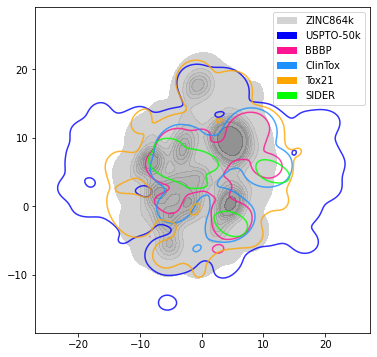

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os
from tqdm import tqdm


pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

log_save_dir = Path(f"./umap-graph-all{pretr}/")
log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [40]
min_dists = [0.4]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

color = ['lightgray', '#0000ff', '#ff1493', '#1e90ff', '#ffa500', '#00ff00', '#66cdaa']


leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))


# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

# dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196, 4200, 41127]
# in_ = [(14544, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544), (489740, 493940), (493940, 535067)]


# dataset_len = [475196, 2039, 1478, 7831, 1427, 641]
# dataset_name_list = [ "BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol", "ZINC", "lipo", "HIV"] 

# in_ = [(14544, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544), (489740, 493940), (493940, 535067)]


# dataset_name_list = ["BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol"]#, "ZINC965k"] 
# in_ = [(0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]#, (14544, 14544+965625)]


dataset_name_list = ["BBBP","clintox", "Tox21", "SIDER", "ZINC864k", "USPTO-50k"] 
in_ = [(0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 12775+864085), (12775+864085, 12775+864085+135605)]

# dataset_name_list= [ "USPTO-50k", "ZINC"]
# in_ = [(0, 135605), (135605, 610801)]

np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X_ = np.load(np_filename)
# df_0 = pd.read_csv(df_filename) 
dir_name = '_'.join(dataset_name_list)
os.system(f"mkdir -p {path}/{dir_name}")
data_len = 610801
for n_neighbor in n_neighbors:
    for min_dist in min_dists:

        np_filename = f'{path}/{dir_name}/np_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.npy'
        df_filename = f'{path}/{dir_name}/df_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.csv'
        filename = ""
        if not os.path.exists(np_filename):
            for i, data_name in enumerate(dataset_name_list):
                df_data = pd.DataFrame()
                filename = filename + f"_{data_name}"
                if i == 0: 
                    X = X_
#                     df_ = df_0
                else:
                    print("Create umap matrix part")

                    np_filename_ = f'{path}/np_{data_name}_pretrainedTrue.npy'
                    df_filename_ = f'{path}/df_{data_name}_pretrainedTrue.csv'
                    print(data_name)
                    X_data = np.load(np_filename_)
                    if os.path.exists(df_filename_):
                        df_data = pd.read_csv(df_filename_)

                    Zinc = True ## ??? # data_name.startswith("ZINC")
                    n = X_data.shape[0]
                    tp = ["train"]*n if Zinc else None
                    tr = np.zeros(n) if Zinc else None
                    X_data = X_data.reshape(n, 1024) if Zinc else X_data
                    df_data["target"] = tr if Zinc else df_data["target"]
                    df_data["level_0"] = tp if Zinc else df_data["level_0"]

                    print(X_data.shape, X.shape)
                    X = np.concatenate((X, X_data))
#                     df_ = pd.concat([df_, df_data], ignore_index=True, sort=False)

#                     if Zinc:
#                         df_data.to_csv(f'{path}/df_{data_name}_pretrainedTrue.csv')
            print(f"---------- neighbor:  {n_neighbor}, minimum distance: {min_dist} ----------")
            data_len = X.shape[0]
            reducer = umap.UMAP(
                n_components=2, min_dist=min_dist, n_neighbors=n_neighbor, transform_seed=5, verbose=True
            ).fit(X[:data_len])
            
            X_umap_ = reducer.transform(X)
            print(f"Saving to {np_filename}")
            data = {
                    "x": X_umap_[:, 0].tolist(),
                    "y": X_umap_[:, 1].tolist(),
#                     "label": df_["target"].values,
#                     "split": df_["level_0"].values,

                }
            print(f"Saving to {np_filename}")
            np.save(file=np_filename, arr=X_umap_)

            df_ = pd.DataFrame(data=data)
            print(f"Saving to {df_filename}")
            df_.to_csv(df_filename)
            
        else:

            print(f"Reading from {df_filename}")
            df = pd.read_csv(df_filename)
            print(f"Reading from {np_filename}")
            X = np.load(np_filename)
            print("X.shape", X.shape)
        
        fig, ax = plt.subplots(figsize=(6, 6))
        # X_filter = X[(X[:,0] >= -2.3) & (X[:,0] <= 2.3) & (X[:,1] >= 1)]
        # df_filter = df[(X[:,0] >= -2.3) & (X[:,0] <= 2.3) & (X[:,1] >= 1)]

        # dataset_name_list__ = ["ZINC", "HIV", "Tox21", "lipo", "BBBP", "clintox", "SIDER", "Genotoxicity", "esol"] 
        # in_ = [(14544, 489740), (493940, 535067), (3517, 11348), (489740, 493940), (0, 2039), (2039, 3517), (11348, 12775), (12775, 13416), (13416, 14544)]
        
        
#         dataset_name_list__ = ["BBBP", "ClinTox", "Tox21", "SIDER", "Micronucleus Assay", "ESOL"] 
#         in_ = [ (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]
        
#         dataset_name_list__ = ["ZINC965k", "BBBP", "ClinTox", "Tox21", "SIDER", "Micronucleus Assay", "ESOL"] 
#         in_ = [(14544, 14544+965625), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]

        dataset_name_list__ = ["ZINC864k", "USPTO-50k", "BBBP", "ClinTox", "Tox21", "SIDER"] 
        in_ = [(12775, 12775+864085), (12775+864085, 12775+864085+135605), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775)]

        # dataset_name_list__ = [ "ZINC", "USPTO-50k"]
        # in_ = [(135605, 610801), (0, 135605)]

#         dataset_name_list__ = [ "ZINC", "USPTO-50k: first input", "USPTO-50k: outher inputs", "USPTO-50k: output"]
#         in_ = [(135605, 610801), (0, 50016), (50016, 85589), (85589, 135605)]
        print(f"Plotting {len(dataset_name_list__)} datasets")
    
        limit = 10000
    
        for i, data_name in enumerate(tqdm(dataset_name_list__)):
            levels, thr, fill, alpha = 2, 0.05, False, 0.8
            if data_name.startswith("ZINC"):
                levels = 10
                thr = 0.001
                fill = True
                alpha = 0.7
            elif 'USPTO' in data_name:
                levels = 1
                fill = False
                alpha = 0.8
                
            x = df["x"].values[in_[i][0] : in_[i][1]][:limit]
            y =  df["y"].values[in_[i][0] : in_[i][1]][:limit]
            
#             thr = min(0.1, 1000.0 / (in_[i][1] - in_[i][0]))
            
            # x_filter = x[(x >= 1) & (x <= 8) & (y >= 0) & (y <= 9)]
            # y_filter = y[(x >= 1) & (x <= 8) & (y >= 0) & (y <= 9)]
            # ax = sns.kdeplot(x_filter, y_filter, alpha=0.6, thresh=.2, levels=Zinc_level, label=f"{data_name}", color=color[i], cmap="viridis")
            print(data_name, levels, thr)
            ax = sns.kdeplot(x[:], y[:], alpha=alpha, thresh=thr, fill=fill, levels=levels, label=f"{data_name}", color=color[i])
        
        handles = [mpatches.Patch(facecolor=color[i], label=dataset_name) for i, dataset_name in enumerate(dataset_name_list__)]
        plt.legend(handles=handles)    # leg.append(f"{data_name}_1")
        name = f"umap_{n_neighbor}_{min_dist}_{'_'.join(dataset_name_list__)}"
        plt.savefig(f"{name}.png")
        print(f"Finish saving: {name}.png")
        plt.savefig(f"{name}.pdf")
        print(f"Finish saving: {name}.pdf")
        

